<a href="https://colab.research.google.com/github/thirstyDev/GermanCreditData/blob/main/BI_Code_Heinrich_Robbe_Vohwinkel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Allgemeine Vorbereitungen

##Bibliotheken einbinden

In [ ]:
# Import der verwendeten Module
import os # Verschiedene Betriebssystemschnittstellen
import random # Pseudo-Zufallszahlengeneratoren
import numpy as np # mathematische Funktionen, Zufallszahlengeneratoren, Routinen der linearen Algebra usw.
import pandas as pd # schnelles, leistungsfähiges, flexibles und einfach zu bedienendes Open-Source-Tool zur Datenanalyse und -manipulation
import matplotlib.pyplot as plt # umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen
import seaborn as sns # Python-Datenvisualisierungsbibliothek basierend auf matplotlib
import tensorflow as tf # End-to-End Open-Source-Plattform für maschinelles Lernen

# Import der verwendeten Funktionen

# scikit-learn Machine Learning in Python
from sklearn.preprocessing import MinMaxScaler # Skalierung
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc # Metriken
from sklearn.model_selection import train_test_split # Trainings+Testdaten
from sklearn.feature_selection import SelectKBest, chi2, f_classif # Notwendig für SKB / Feature-Selektion

# Tensorflow / Keras
from tensorflow.keras.models import Sequential # Model
from tensorflow.keras.layers import Activation, Dense, Dropout # Layer
from tensorflow.keras import optimizers # Optimizers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping

# Oversampling
from imblearn.over_sampling import SMOTE

##Zufallsparameter setzen
Festlegen von einheitlichen Zufallsparametern für Wiederholbarkeit, Nachvollziehbarkeit und Überprüfbarkeit

In [ ]:
# Variable für Zufallsparameter definieren
random_seed = 666

# Zufallsparameter für 'PYTHONHASHSEED' environment variable
os.environ['PYTHONHASHSEED']=str(random_seed)

# Zufallsparameter für 'python' built-in pseudo-random generator
random.seed(random_seed)

# Zufallsparameter für 'numpy' pseudo-random generator
np.random.seed(random_seed)

# Zufallsparameter für 'tensorflow' pseudo-random generator
tf.random.set_seed(random_seed)

# Quelle: https://odsc.medium.com/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752

##Daten importieren

In [ ]:
# Daten einlesen, formatieren und Spaltennamen vergeben
credit_data_raw = pd.read_csv("german.data", sep=' ', names=['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount',
                                                             'savings', 'employment_since', 'installment_rate', 'status_sex', 'other_debtors',
                                                             'residence_since', 'property', 'age', 'other_installment_plans', 'housing',
                                                             'existing_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'classification'])

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

In [ ]:
# Prüfung, ob es fehlende Werte gibt
print(credit_data_raw.isnull().sum().sum())

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

0


Ergebnis: Es gibt keine fehlenden Werte im Datensatz.

##Label binarisieren

In [ ]:
# Kreditwürdigkeit von 1/2 auf 0/1 binarisieren. 
# original: 1: good / 2 = bad -> binär: 1 = good / 0 = bad
# 0 = schlechter Kreditnehmer, 1 = guter Kreditnehmer

credit_data_raw.classification.replace([1,2], [1,0], inplace=True)

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

##Selektion von numerischen und kategorialen Merkmalen vereinfachen
Um die Selektion von numerischen und kategorialen Merkmalen vereinfachen, werden entsprechende Variablen angelegt.

In [ ]:
# Liste aller numerischen Variablen
num_vars = ['credit_amount', 'duration', 'installment_rate', 'residence_since', 'age', 
           'existing_credits', 'people_liable']

# Liste aller kategoriellen Variablen
categorial_vars = ['existing_checking', 'credit_history', 'purpose', 'savings', 'employment_since',
           'status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 
           'telephone', 'foreign_worker']

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

##Feature-Beschreibungen lesbar machen


In [ ]:
# Kopie des Datensatzes erstellen
credit_data_w_feature_des = credit_data_raw.copy()

# Einfügen der ausformulierten Merkmalsausprägungen
credit_data_w_feature_des['existing_checking'] = credit_data_w_feature_des['existing_checking'].map({'A11':'A11: < 0 DM',
                                                                                                     'A12':'A12: 0 < 200 DM',
                                                                                                     'A13':'A13: >= 200 DM/salary assignments for at least 1 year',
                                                                                                     'A14':'A14: no checking account'},
                                                                                                    na_action=None)

credit_data_w_feature_des['credit_history'] = credit_data_w_feature_des['credit_history'].map({'A30':'A30: no credits taken/all credits paid back duly',
                                                                                               'A31':'A31: all credits at this bank paid back duly',
                                                                                               'A32':'A32: existing credits paid back duly till now',
                                                                                               'A33':'A33: delay in paying off in the past',
                                                                                               'A34':'A34: critical account/other credits existing (not at this bank)'},
                                                                                              na_action=None)

credit_data_w_feature_des['savings'] = credit_data_w_feature_des['savings'].map({'A61':'A61: < 100 DM',
                                                                                 'A62':'A62: 100 < 500 DM',
                                                                                 'A63':'A63: 500 < 1000 DM',
                                                                                 'A64':'A64: >= 1000 DM',
                                                                                 'A65':'A65: unknown/no savings account'},
                                                                                na_action=None)

credit_data_w_feature_des['employment_since'] = credit_data_w_feature_des['employment_since'].map({'A71':'A71: unemployed',
                                                                                                   'A72':'A72: < 1 year',
                                                                                                   'A73':'A73: 1 < 4 years',
                                                                                                   'A74':'A74: 4 < 7 years',
                                                                                                   'A75':'A75: >= 7 years'},
                                                                                                  na_action=None)

credit_data_w_feature_des['status_sex'] = credit_data_w_feature_des['status_sex'].map({'A91':'A91: male: divorced/separated',
                                                                                       'A92':'A92: female: divorced/separated/married',
                                                                                       'A93':'A93: male: single',
                                                                                       'A94':'A94: male: married/widowed',
                                                                                       'A95':'A95: female: single'},
                                                                                      na_action=None)

credit_data_w_feature_des['other_debtors'] = credit_data_w_feature_des['other_debtors'].map({'A101':'A101: none',
                                                                                             'A102':'A102: co-applicant',
                                                                                             'A103':'A103: guarantor'},
                                                                                            na_action=None)

credit_data_w_feature_des['property'] = credit_data_w_feature_des['property'].map({'A121':'A121: real estate',
                                                                                   'A122':'A122: if not A121: building society savings agreement/life insurance',
                                                                                   'A123':'A123: if not A121/A122: car or other, not in attribute "savings"',
                                                                                   'A124':'A124: unknown/no property'},
                                                                                  na_action=None)

credit_data_w_feature_des['other_installment_plans'] = credit_data_w_feature_des['other_installment_plans'].map({'A141':'A141: bank',
                                                                                                                 'A142':'A142: stores',
                                                                                                                 'A143':'A143: none'},
                                                                                                                na_action=None)

credit_data_w_feature_des['housing'] = credit_data_w_feature_des['housing'].map({'A151':'A151: rent',
                                                                                 'A152':'A152: own',
                                                                                 'A153':'A153: for free'},
                                                                                na_action=None)

credit_data_w_feature_des['job'] = credit_data_w_feature_des['job'].map({'A171':'A171: unemployed/unskilled - non-resident',
                                                                         'A172':'A172: unskilled - resident',
                                                                         'A173':'A173: skilled employee/official',
                                                                         'A174':'A174: management/self-employed/highly qualified employee/officer'},
                                                                        na_action=None)

credit_data_w_feature_des['telephone'] = credit_data_w_feature_des['telephone'].map({'A191':'A191: none',
                                                                                     'A192':'A192: yes, registered under the customers name'},
                                                                                    na_action=None)

credit_data_w_feature_des['foreign_worker'] = credit_data_w_feature_des['foreign_worker'].map({'A201':'A201: yes',
                                                                                               'A202':'A202: no'},
                                                                                              na_action=None)

# Data Understanding

## Übersicht über den Datensatz

In [ ]:
credit_data_w_feature_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   existing_checking        1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_since         1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   status_sex               1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
# Statistische Verteilung der numerischen Variablen 
credit_data_w_feature_des.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


## Allgemeine Untersuchungen

### Verteilung des Kreditbetrags
Die meisten Kredite sind < 5000 EUR

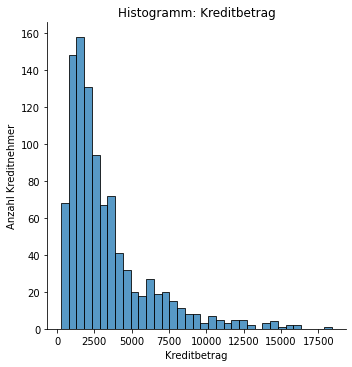

In [ ]:
sns.displot(credit_data_w_feature_des.credit_amount).set(title="Histogramm: Kreditbetrag").set_axis_labels("Kreditbetrag", "Anzahl Kreditnehmer")

### Boxplot für stetige Variablen
**Erkenntnisse:**
* Der Kreditbetrag hat eine enge Box, aber auch eine große Spannweite.
* Bei der Kreditlänge gibt es weniger Ausreißer

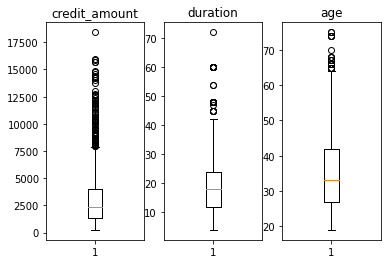

In [ ]:
#Boxplot die Kreditmange, Kreditlaufzeit und Alter der Kreditnehmer (Quelle:Folie 108)
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(credit_data_w_feature_des['credit_amount'])
axes[0].set_title('credit_amount')
axes[1].boxplot(credit_data_w_feature_des['duration'])
axes[1].set_title('duration')
axes[2].boxplot(credit_data_w_feature_des['age'])
axes[2].set_title('age')

fig.savefig("boxplots.png")

### Histogramm für kategoriale Variablen
**Erkenntnisse:**
* "No checking Account" deutet auf Kreditwürdigkeit hin.
* Arbeitslosigkeit oder eine kurze Zeit im Job deuten auch eine schlechte Kreditwürdigkeit hin.
* Der Besitz von Wohneigentum deutet auf eine hohe Kreditwürdigkeit hin.

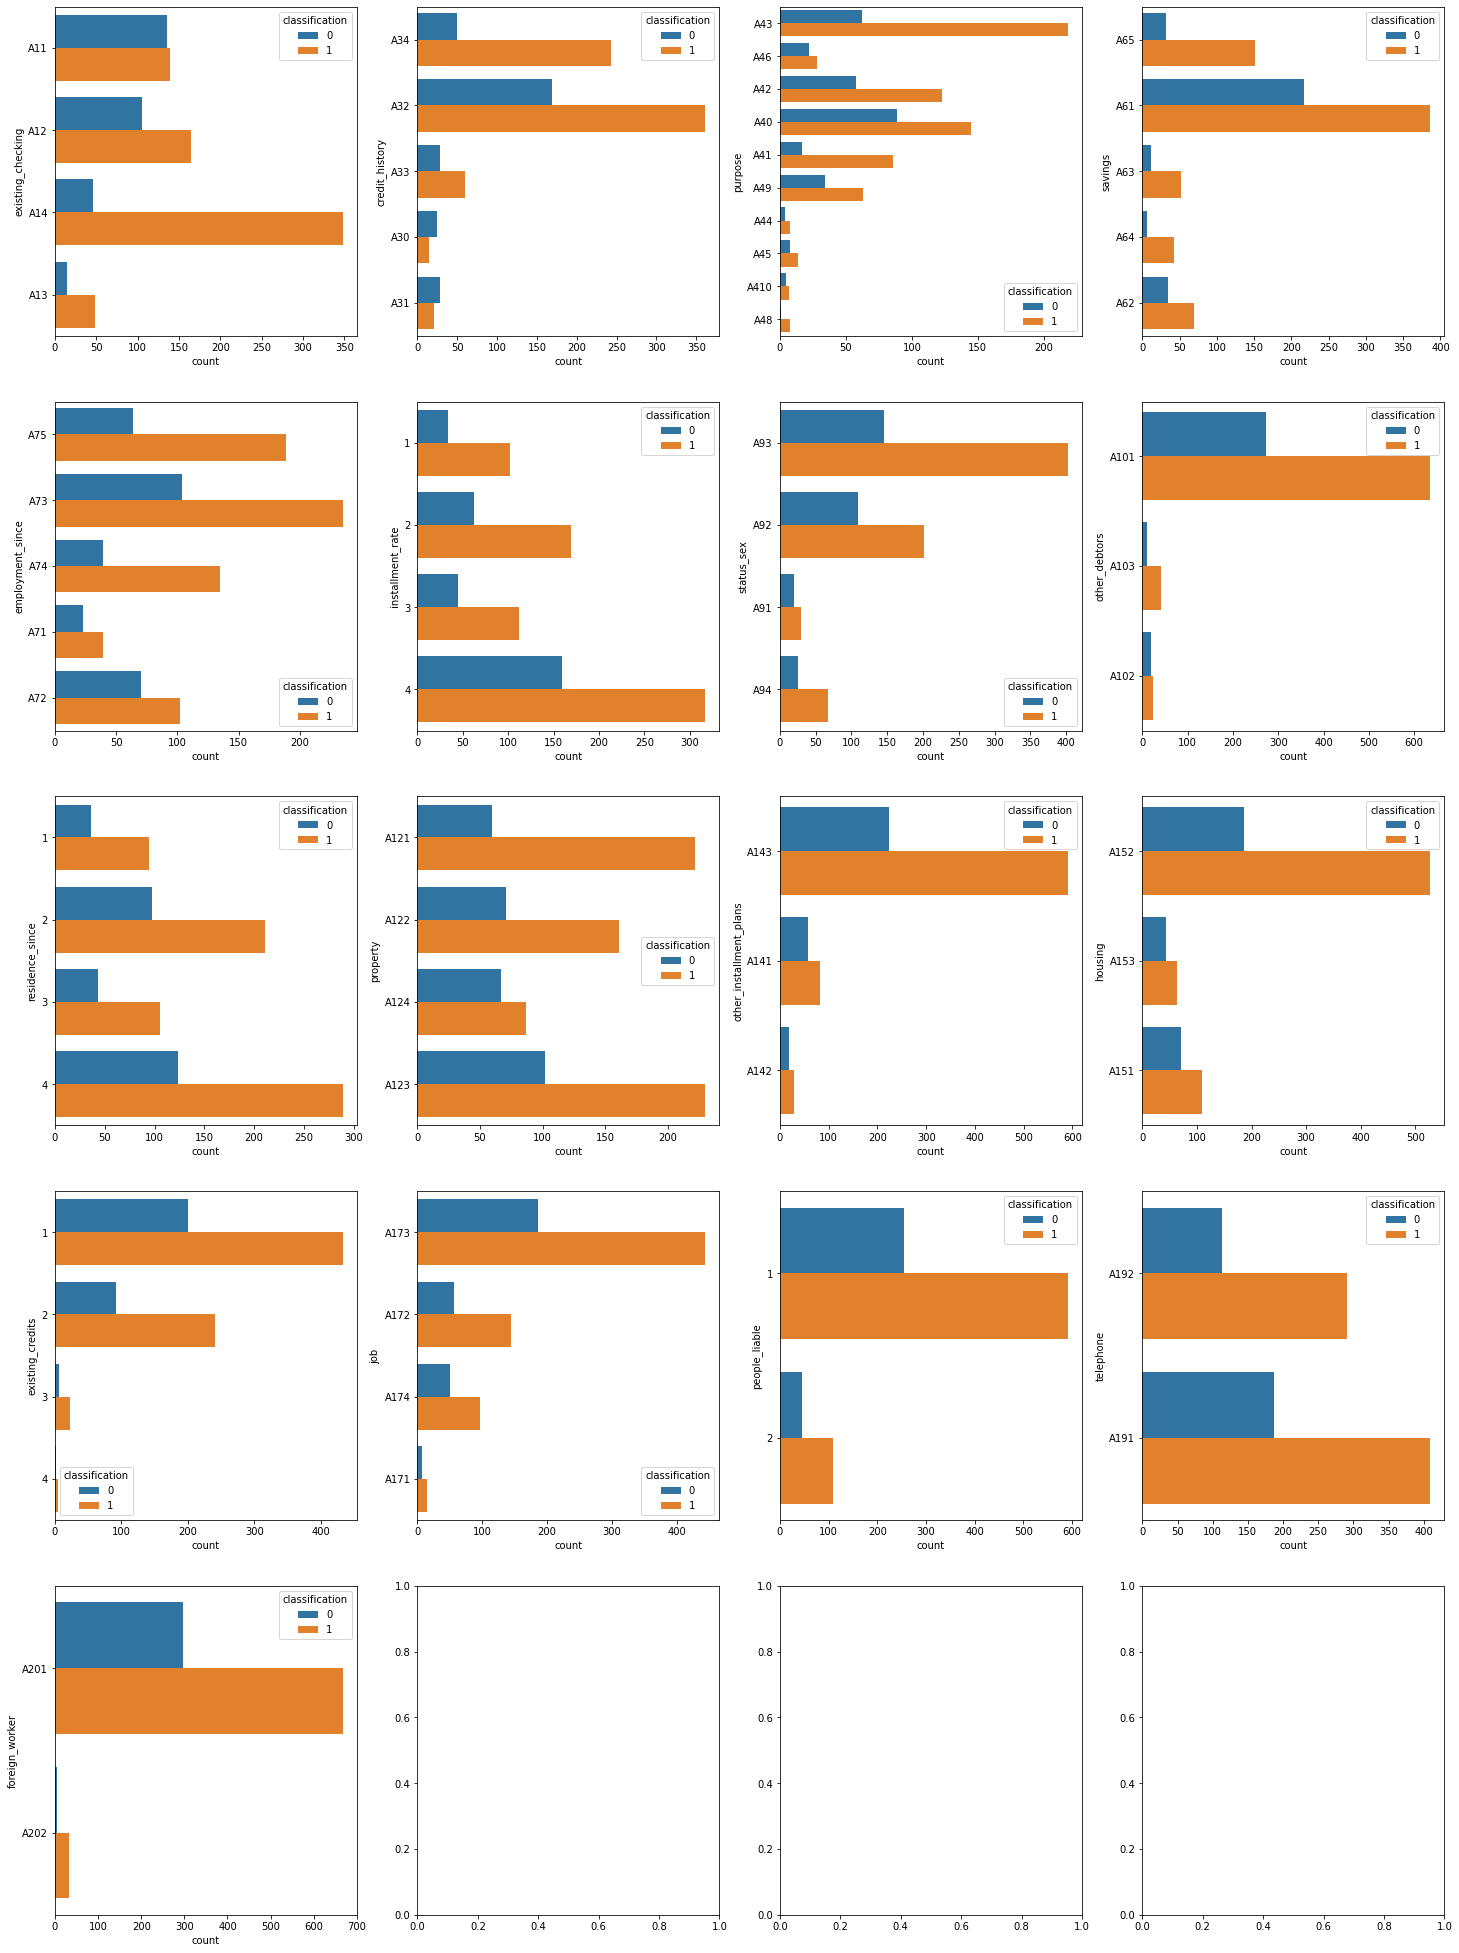

In [ ]:
f, axes = plt.subplots(5, 4,figsize=(8.3*3,11.7*3))
x=0
y=0
for column in credit_data_w_feature_des.drop(['classification','credit_amount','duration','age'], axis=1):
    sns.countplot(y=column, hue="classification", data=credit_data_raw.drop(['credit_amount','duration','age'],axis=1), ax=axes[x,y])
      
    y+=1
    if y>3:
        x+=1
        y=0
    if x>4:
        break
f.savefig("histograms5.png")

### Suche nach Korrelation von Features 
**Ziel:** Datenexploration und ggf. Dimensionsreduktion

In [ ]:
# Aufzählung stark korrelierter Werte (nach Einzelnen auswahlen und sortiert)
c = credit_data_w_feature_des.corr()
s = c.stack()
# Auswählen aller Korrelationen mit |x|>0,2. Im Anschluss werden diese Werte sortiert.
so = s[(0.2<s) & (s<1) | (-1<s) & (s<-0.2)].sort_values(ascending=False, kind='quicksort')
print(so)

credit_amount     duration            0.624984
duration          credit_amount       0.624984
age               residence_since     0.266419
residence_since   age                 0.266419
classification    duration           -0.214927
duration          classification     -0.214927
installment_rate  credit_amount      -0.271316
credit_amount     installment_rate   -0.271316
dtype: float64


(10.0, 0.0)

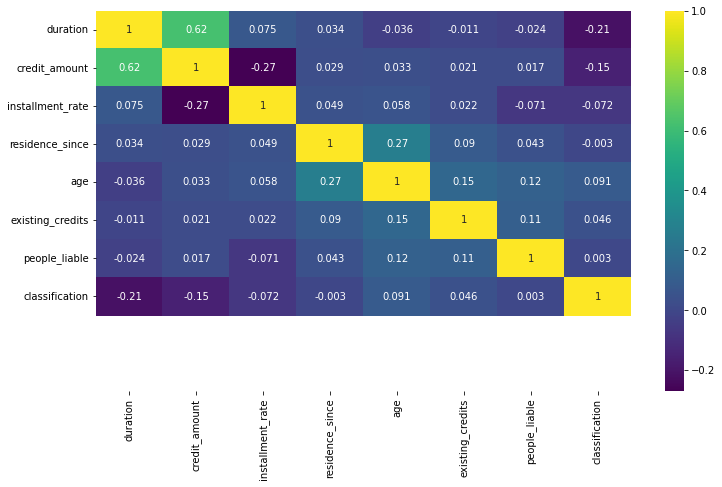

In [ ]:
# Erstellung einer Korrelationstabelle
plt.figure(figsize=(12,7))
sns.heatmap(credit_data_w_feature_des.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

# Quelle: https://jovian.ai/aswiniabraham/german-credit-risk

### Einflüsse auf die Klassifikation

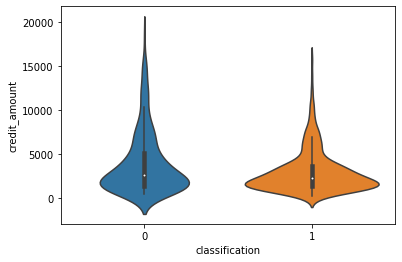

In [ ]:
# Violinenplot, um die Verteilung des Kreditbetrags anhand der Klassifikaiton darzustellen.
# Ergebnis: Außerordentlich viele gute Kredite befinden sich im Bereich < 5000 EUR
# sns.swarmplot(x='classification',y='credit_amount',data=credit_data_w_feature_des, size=2) // Alternative zu Violinenplot
sns.violinplot(x='classification',y='credit_amount',data=credit_data_w_feature_des)

In [ ]:
# Auswertung des Kreditbetrags in Abhängigkeit der Klassifikation
# Ergebnis: Gute Kredit sind tendenziell kleiner. Der Unterschied wird ab dem dritten Quartil deutlicher.
credit_data_w_feature_des.groupby('classification')['credit_amount'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
0,300.0,3938.126667,3535.818955,433.0,1352.5,2574.5,5141.50,18424.0
1,700.0,2985.457143,2401.472278,250.0,1375.5,2244.0,3634.75,15857.0


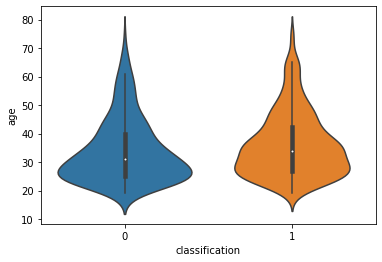

In [ ]:
sns.violinplot(x='classification',y='age',data=credit_data_w_feature_des)

In [ ]:
# Auswertung des Alters des Kreditnehmers in Abhängigkeit der Klassifikation
# Gute Kreditnehmer sind etwas älter. Der Effekt ist recht schwach und nicht statistisch signifikant.
credit_data_w_feature_des.groupby('classification')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
0,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0
1,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0


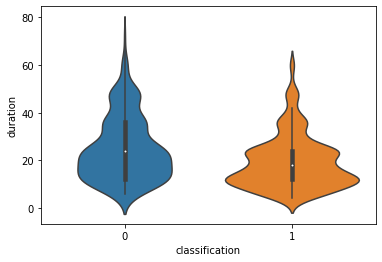

In [ ]:
sns.violinplot(x='classification',y='duration',data=credit_data_w_feature_des)

In [ ]:
# Auswertung des Kreditlaufzeit in Abhängigkeit der Klassifikation
# Gute Kredite laufen kürzer. 3. Quartil und Max sind deutliche Indikatoren.
credit_data_w_feature_des.groupby('classification')['duration'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
0,300.0,24.860000,13.282639,6.0,12.0,24.0,36.0,72.0
1,700.0,19.207143,11.079564,4.0,12.0,18.0,24.0,60.0


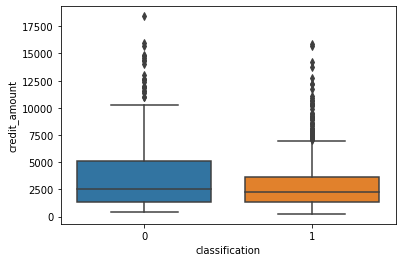

In [ ]:
# Boxplot zum Verhältnis zwischen Kreditwürdigkeit und Kreditbetrag.
# Ergebnis: Hohe Beträge sind tendenziell gefährlich
sns.boxplot(x='classification',y='credit_amount',data=credit_data_w_feature_des)

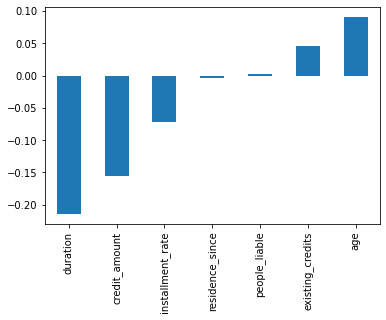

In [ ]:
# Darstellung der Korrelation zwischen KLassifikation und den numerischen Features um die Einflüsse vergleichen zu können.
credit_data_w_feature_des.corr()['classification'].sort_values().drop('classification').plot(kind='bar')


### Einfluss der Beschäftigung

In [ ]:
# Vorverarbeitung: Ordnen der Beschäftigungszeit anhand der Zeit um eine "logische Darstellung" erreichen zu können
emp_length_order = ['A71: unemployed',
                    'A72: < 1 year',
                    'A73: 1 < 4 years',
                    'A74: 4 < 7 years',
                    'A75: >= 7 years',] 

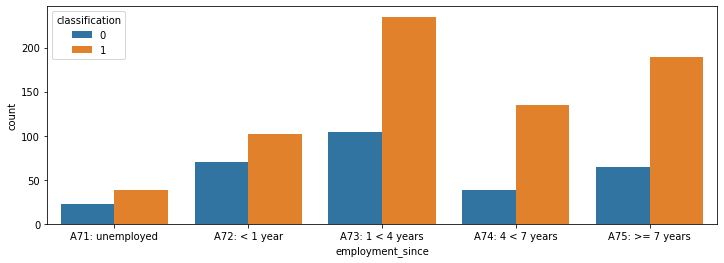

In [ ]:
# Darstellung der Klassifikationsverteilung anhand der BEschäftigungszeit des Kreditnehmers.
# Ergebnis: Bei Längerer Beschäftigung steigt die Wahrscheinlichkeit eines guten Kreditnehmers
plt.figure(figsize=(12,4))
sns.countplot(x='employment_since',data=credit_data_w_feature_des,order=emp_length_order,hue='classification')

In [ ]:
# Darstellung der Wahrscheinlichkeit eines Ausfalls in Abhängigkeit zur Beschäftigungsdauer
# Klare Tendenz, aber kein linearer Verlauf. Offene Frage: Sachlicher Grund oder zu kleines Sample?
emp_co = credit_data_w_feature_des[credit_data_w_feature_des['classification']==0].groupby("employment_since").count()['classification']
emp_fp = credit_data_w_feature_des[credit_data_w_feature_des['classification']==1].groupby("employment_since").count()['classification']
emp_len = emp_co/emp_fp
emp_len

employment_since
A71: unemployed     0.589744
A72: < 1 year       0.686275
A73: 1 < 4 years    0.442553
A74: 4 < 7 years    0.288889
A75: >= 7 years     0.338624
Name: classification, dtype: float64

##Beispiel-Plot mit Daten mit ausführlichen Beschreibungen

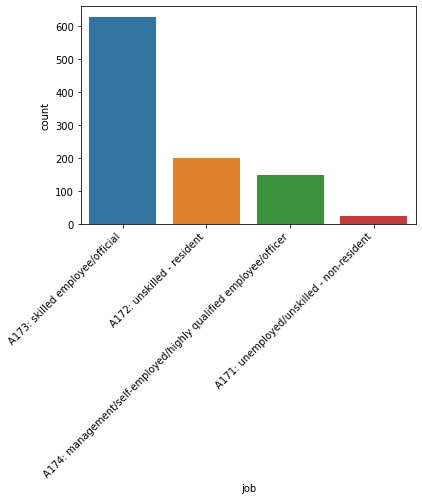

<Figure size 1440x1440 with 0 Axes>

In [ ]:
ax = sns.countplot(x='job',data=credit_data_w_feature_des)
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.figure(figsize=(20,20)) # this creates a figure 8 inch wide, 4 inch high
plt.tight_layout()

plt.show()

#Data Preparation

##Allgemeine Vorbereitungen

###Datensatz durchmischen

In [ ]:
# Datensatz durch Sampling durchmischen, um evtl. vorhandene Sortierung der Datensätze auszuschließen
credit_data_raw = credit_data_raw.sample(frac=1, random_state=random_seed)

###Standardisierung der numerischen Werte

In [ ]:
# MinMax Skalierung
credit_data_num_minmax = pd.DataFrame(MinMaxScaler().fit_transform(credit_data_raw[num_vars]))

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

# Header wiederherstellen
credit_data_num_minmax = credit_data_num_minmax.rename(columns={0:'credit_amount',
                                                                1:'duration',
                                                                2:'installment_rate',
                                                                3:'residence_since',
                                                                4:'age',
                                                                5:'existing_credits',
                                                                6:'people_liable'})

###Dummy-Variablen

In [ ]:
# Dummy-Variablen / One-Hot-Encoding
dummy_vars = pd.get_dummies(credit_data_raw[categorial_vars])

###Daten zusammensetzen

In [ ]:
# Vorbereitete Daten zusammenführen
credit_data_minmax = pd.concat([credit_data_num_minmax, dummy_vars, credit_data_raw['classification']], axis = 1)

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

###Erstellen von Trainings- und Testdaten

In [ ]:
X_minmax = credit_data_minmax.drop('classification', axis=1)
y_minmax = credit_data_minmax['classification']
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax,y_minmax,test_size=0.2, random_state=random_seed)

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

##Vorbereitungen für verschiedene Modell-Iterationen

###Vorbereitungen für SMOTE
 - Synthetic Minority Oversampling Technique 

In [ ]:
# Oversampling, wird benötigt bei einem "imbalanced" Datensatz
# Es werden mehrere der "seltenen" Werte betrachtet um für Ausgleich zu sorgen.

# SMOTE ist eine Art von Oversampling (bekannteste Alternative Random Oversampling)
# SMOTE = Synthetic minority oversampling technique
# Smote erstellt neue Datenpunkte, indem 1.) Datenpunkte mit x nearest enighbors verbunden werden und 
# 2.) auf den Verbindungslinien neue Datenpunkte kreiert werden
# Wir wenden Smote nur auf die Trainingsdaten an!

In [ ]:
#Smote durchführen
smote = SMOTE(sampling_strategy='auto', random_state = random_seed)
X_train_minmax_smote, y_train_minmax_smote = smote.fit_resample(X_train_minmax, y_train_minmax)

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

In [ ]:
#Anzahl Datenpunkte vor SMOTE
X_train_minmax.shape[0]

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

800

In [ ]:
#Anzahl Datenpunkte nach SMOTE
X_train_minmax_smote.shape[0]

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

1116

In [ ]:
# Wir sehen: Vorher gab es nur 242 Kreditausfälle, nun gibt es 558. Somit sind viel viel näher an einer Gleichverteilung von 500/500
print("Anz. gute/schlechte Kreditnehmer vor/nach SMOTE")
unique, counts = np.unique(y_train_minmax, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_minmax_smote, return_counts=True)
print(dict(zip(unique, counts)))

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

Anz. gute/schlechte Kreditnehmer vor/nach SMOTE
{0: 242, 1: 558}
{0: 558, 1: 558}


###Feature-Reduktion (Select K Best)

In [ ]:
# Feature-Reduktion
# SelectKBest bewertet die einzelnen Features und behält nur die 50 wichtigsten
# Es müssen die skalierten Daten(X_train_minmax_res und y_train_minmax_res) genutzt werden, da die Methode nur mit 
# positiven Zahlen funktioniert

# Quelle: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
select_k_best = SelectKBest(chi2, k=30).fit(X_train_minmax, y_train_minmax) 

f = select_k_best.get_support(1) #the most important features

X_train_minmax_skb = X_train_minmax[X_train_minmax.columns[f]]
X_test_minmax_skb = X_test_minmax[X_test_minmax.columns[f]]

y_train_minmax_skb = y_train_minmax
y_test_minmax_skb = y_test_minmax

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

###Smote + Feature-Reduktion (Select K Best)

In [ ]:
select_k_best_smote = SelectKBest(chi2, k=30).fit(X_train_minmax_smote, y_train_minmax_smote) 

f = select_k_best_smote.get_support(1) #the most important features

X_train_minmax_smote_skb = X_train_minmax_smote[X_train_minmax_smote.columns[f]]
X_test_minmax_smote_skb = X_test_minmax[X_test_minmax.columns[f]]

y_train_minmax_smote_skb = y_train_minmax_smote
y_test_minmax_smote_skb = y_test_minmax

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

#Modeling

##Basismodell (basic)

In [ ]:
#Modell initialisieren
model_basic = Sequential()

#INPUT LAYER
#Anzahl Neuronen = Anzahl Features
model_basic.add(Dense(X_train_minmax.shape[1], input_shape=(X_train_minmax.shape[1],)))

#HIDDEN LAYER
#Anzahl Neuronen = Anzahl Features
#Activation: Scaled Exponential Linear Unit (SELU)
model_basic.add(Dense(X_train_minmax.shape[1], activation='selu', kernel_initializer='lecun_normal'))

#OUTPUT LAYER
model_basic.add(Dense(1, Activation('sigmoid')))

#Modell kompilieren
#Loss: binary_crossentropy
model_basic.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#Modell trainieren
model_basic.fit(x=X_train_minmax, y=y_train_minmax, epochs=100,
         validation_data=(X_test_minmax,y_test_minmax), verbose=0)

# Quelle: https://www.kaggle.com/twunderbar/german-credit-risk-classification-with-keras
# Quelle: https://www.udemy.com/course/python-data-science-machine-learning/learn/lecture/23354146#overview
# Quelle: https://keras.io/api/models/sequential/
# Quelle: https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6
# Quelle: https://keras.io/api/optimizers/adam/
# Quelle: https://keras.io/api/losses/

In [ ]:
# Modell-Zusammenfassung
model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 61)                3782      
                                                                 
 dense_1 (Dense)             (None, 61)                3782      
                                                                 
 dense_2 (Dense)             (None, 1)                 62        
                                                                 
Total params: 7,626
Trainable params: 7,626
Non-trainable params: 0
_________________________________________________________________


##Optimiertes Basismodell (basic_opt)

In [ ]:
#Early Stopping
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=25,restore_best_weights=True)

# Quelle: https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd

In [ ]:
#Modell initialisieren
model_basic_opt = Sequential()

#INPUT LAYER
#Anzahl Neuronen = Anzahl Features
model_basic_opt.add(Dense(X_train_minmax.shape[1], input_shape=(X_train_minmax.shape[1],)))

#HIDDEN LAYER
#Anzahl Neuronen = Anzahl Features
#Activation: Scaled Exponential Linear Unit (SELU)
model_basic_opt.add(Dense(X_train_minmax.shape[1], activation='selu', kernel_initializer='lecun_normal'))

#Dropout
model_basic_opt.add(Dropout(0.4,seed=random_seed)) # üblich Werte zwischen 0.2 und 0.4

#OUTPUT LAYER
model_basic_opt.add(Dense(1, Activation('sigmoid')))

#Modell kompilieren
#Loss: binary_crossentropy
model_basic_opt.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#Modell trainieren
model_basic_opt.fit(x=X_train_minmax, y=y_train_minmax, epochs=100,
         validation_data=(X_test_minmax,y_test_minmax), verbose=0,
         callbacks=[early_stop])

In [ ]:
# Modell-Zusammenfassung
model_basic_opt.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 61)                3782      
                                                                 
 dense_4 (Dense)             (None, 61)                3782      
                                                                 
 dropout (Dropout)           (None, 61)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 62        
                                                                 
Total params: 7,626
Trainable params: 7,626
Non-trainable params: 0
_________________________________________________________________


##Optimiertes Basismodell + SMOTE (smote)

Anwendung auf dem optimierten Basismodell

In [ ]:
#Modell initialisieren
model_smote = Sequential()

#INPUT LAYER
#Anzahl Neuronen = Anzahl Features
model_smote.add(Dense(X_train_minmax_smote.shape[1], input_shape=(X_train_minmax_smote.shape[1],)))

#HIDDEN LAYER
#Anzahl Neuronen = Anzahl Features
#Activation: Scaled Exponential Linear Unit (SELU)
model_smote.add(Dense(X_train_minmax_smote.shape[1], activation='selu', kernel_initializer='lecun_normal'))

#Dropout
model_smote.add(Dropout(0.4,seed=random_seed)) # üblich Werte zwischen 0.2 und 0.4

#OUTPUT LAYER
model_smote.add(Dense(1, Activation('sigmoid')))

#Modell kompilieren
#Loss: binary_crossentropy
model_smote.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#Modell trainieren
model_smote.fit(x=X_train_minmax_smote, y=y_train_minmax_smote, epochs=100,
         validation_data=(X_test_minmax,y_test_minmax), verbose=0,
         callbacks=[early_stop])


In [ ]:
# Modell-Zusammenfassung
model_smote.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 61)                3782      
                                                                 
 dense_7 (Dense)             (None, 61)                3782      
                                                                 
 dropout_1 (Dropout)         (None, 61)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 62        
                                                                 
Total params: 7,626
Trainable params: 7,626
Non-trainable params: 0
_________________________________________________________________


##Optimiertes Basismodell + Feature-Reduktion (skb)

In [ ]:
#Modell initialisieren
model_skb = Sequential()

#INPUT LAYER
#Anzahl Neuronen = Anzahl Features
model_skb.add(Dense(X_train_minmax_skb.shape[1], input_shape=(X_train_minmax_skb.shape[1],)))

#HIDDEN LAYER
#Anzahl Neuronen = Anzahl Features
#Activation: Scaled Exponential Linear Unit (SELU)
model_skb.add(Dense(X_train_minmax_skb.shape[1], activation='selu', kernel_initializer='lecun_normal'))

#Dropout
model_skb.add(Dropout(0.4,seed=random_seed)) # üblich Werte zwischen 0.2 und 0.4

#OUTPUT LAYER
model_skb.add(Dense(1, Activation('sigmoid')))

#Modell kompilieren
#Loss: binary_crossentropy
model_skb.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#Modell trainieren
model_skb.fit(x=X_train_minmax_skb, y=y_train_minmax_skb, epochs=100,
         validation_data=(X_test_minmax_skb,y_test_minmax_skb), verbose=0,
         callbacks=[early_stop])

In [ ]:
# Modell-Zusammenfassung
model_skb.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


##Optimiertes Basismodell + SMOTE + Feature-Reduktion (smote_skb)

In [ ]:
#Modell initialisieren
model_smote_skb = Sequential()

#INPUT LAYER
#Anzahl Neuronen = Anzahl Features
model_smote_skb.add(Dense(X_train_minmax_smote_skb.shape[1], input_shape=(X_train_minmax_smote_skb.shape[1],)))

#HIDDEN LAYER
#Anzahl Neuronen = Anzahl Features
#Activation: Scaled Exponential Linear Unit (SELU)
model_smote_skb.add(Dense(X_train_minmax_smote_skb.shape[1], activation='selu', kernel_initializer='lecun_normal'))

#Dropout
model_smote_skb.add(Dropout(0.4,seed=random_seed)) # üblich Werte zwischen 0.2 und 0.4

#OUTPUT LAYER
model_smote_skb.add(Dense(1, Activation('sigmoid')))

#Modell kompilieren
#Loss: binary_crossentropy
model_smote_skb.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#Modell trainieren
model_smote_skb.fit(x=X_train_minmax_smote_skb, y=y_train_minmax_smote_skb, epochs=100,
         validation_data=(X_test_minmax_smote_skb,y_test_minmax_smote_skb), verbose=0,
         callbacks=[early_stop])

In [ ]:
# Modell-Zusammenfassung
model_smote_skb.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


#Evaluation

##Funktionenen und Variablen definieren

In [ ]:
# DataFrame erstellen, in dem die Metriken der einzelnen Modelle für den späteren Vergleich gespeichert werden
evaluation = pd.DataFrame(columns = ['accuracy','precision_0','precision_1','auc','loss','true_positives','true_negatives','false_positives','false_negatives'])

In [ ]:
# ROC Metrik
# Function um Grafik für eine ROC-Kurve zu erstellen.
def get_roc(y_test,y_pred,name,title):
    
    # Brechne ROC curve und ROC area
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Grafik ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(name+".png")
    plt.show()
    plt.close()

# Funktion um den AUC-Wert zu berechnen
def get_auc_value(y_test,y_pred):
    
    # Brechne ROC curve und ROC area
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return roc_auc

# Quelle: https://github.com/tobikuhlmann/credit-risk-classification/blob/master/germancredit.ipynb

In [ ]:
# Funktion, um Plots anzuzeigen und zu speichern
def plot_and_save_fig(name,title,plot):
  plt.figure()
  plt.plot(plot)
  plt.legend(plot)
  plt.title(title)
  plt.savefig(name+".png")
  plt.show()
  plt.close()

# Quelle: https://stackoverflow.com/a/57576314

## Basismodell (basic)

In [ ]:
# History des Modells auslesen
history_basic = pd.DataFrame(model_basic.history.history)

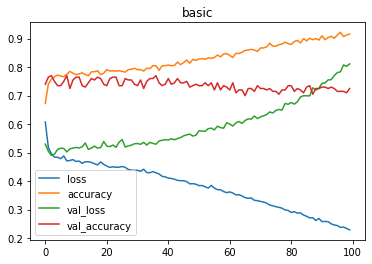

In [ ]:
# History des Modells grafisch anzeigen und als Grafik abspeichern 
plot_and_save_fig("history_basic","basic", history_basic)

In [ ]:
# Accuracy und Loss ermitteln
basic_test_loss, basic_test_acc = model_basic.evaluate(X_test_minmax, y_test_minmax, verbose=0)

# Auf Basis des Modells für die Testdaten vorhersagen
predictions_basic = (model_basic.predict(X_test_minmax) > 0.5).astype("int32")

# Weitere Daten für die Evaluation erzeugen, auslesen und in das 'evaluation' DataFrame schreiben

# Speichern des 'classification_report' in ein Dictionary
report_basic = classification_report(y_test_minmax,predictions_basic, output_dict = True)

# Werte der Confusion Matrix generieren
tn_basic, fp_basic, fn_basic, tp_basic = confusion_matrix(y_test_minmax,predictions_basic).ravel()

# Vorbereitete Werte zusammenfassen und für Hinzufügen zum DataFrame vorbereiten
values_to_add = {'accuracy': report_basic['accuracy'], 
                 'precision_0': report_basic['0']['precision'],
                 'precision_1': report_basic['1']['precision'],
                 'auc': get_auc_value(y_test_minmax,predictions_basic),
                 'loss': basic_test_loss,
                 'true_positives': tp_basic,
                 'true_negatives': tn_basic,
                 'false_positives': fp_basic,
                 'false_negatives': fn_basic}

row_to_add = pd.Series(values_to_add, name='basic')

# Werte dem DataFrame hinzufügen
evaluation = evaluation.append(row_to_add)

# Quelle: https://www.kite.com/python/answers/how-to-fill-a-pandas-dataframe-row-by-row-in-python
# Quelle: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# Quelle: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Quelle: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
# Quelle: https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

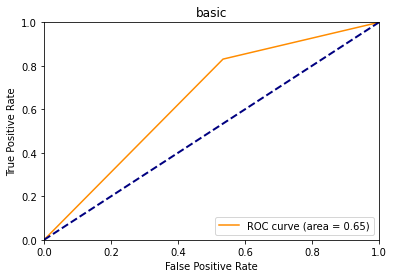

In [ ]:
# ROC Grafik für Modell erzeugen und abspeichern 
get_roc(y_test_minmax,predictions_basic,'roc_basic','basic')

##Optimiertes Basismodell (basic_opt)

In [ ]:
# History des Modells auslesen
history_basic_opt = pd.DataFrame(model_basic_opt.history.history)

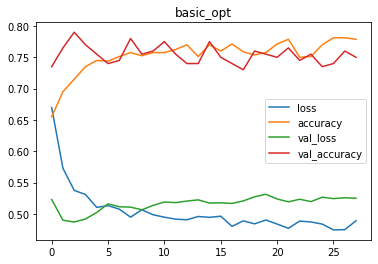

In [ ]:
# History des Modells grafisch anzeigen und als Grafik abspeichern 
plot_and_save_fig("history_basic_opt","basic_opt", history_basic_opt)

In [ ]:
# Accuracy und Loss ermitteln
basic_opt_test_loss, basic_opt_test_acc = model_basic_opt.evaluate(X_test_minmax, y_test_minmax, verbose = 0)

# Auf Basis des Modells für die Testdaten vorhersagen
predictions_basic_opt = (model_basic_opt.predict(X_test_minmax) > 0.5).astype("int32")

# Weitere Daten für die Evaluation erzeugen, auslesen und in das 'evaluation' DataFrame schreiben

# Speichern des 'classification_report' in ein Dictionary
report_basic_opt = classification_report(y_test_minmax,predictions_basic_opt, output_dict = True)

# Werte der Confusion Matrix generieren
tn_basic_opt, fp_basic_opt, fn_basic_opt, tp_basic_opt = confusion_matrix(y_test_minmax,predictions_basic_opt).ravel()

# Vorbereitete Werte zusammenfassen und für Hinzufügen zum DataFrame vorbereiten
values_to_add = {'accuracy': report_basic_opt['accuracy'],
                 'precision_0': report_basic_opt['0']['precision'],
                 'precision_1': report_basic_opt['1']['precision'],
                 'auc': get_auc_value(y_test_minmax,predictions_basic_opt),
                 'loss': basic_opt_test_loss,
                 'true_positives': tp_basic_opt,
                 'true_negatives': tn_basic_opt,
                 'false_positives': fp_basic_opt,
                 'false_negatives': fn_basic_opt}

row_to_add = pd.Series(values_to_add, name='basic_opt')

# Werte dem DataFrame hinzufügen
evaluation = evaluation.append(row_to_add)

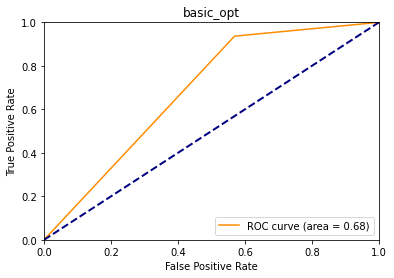

In [ ]:
# ROC Grafik für Modell erzeugen und abspeichern
get_roc(y_test_minmax,predictions_basic_opt,'roc_basic_opt','basic_opt')

##Optimiertes Basismodell + SMOTE (smote)

In [ ]:
# History des Modells auslesen
history_smote = pd.DataFrame(model_smote.history.history)

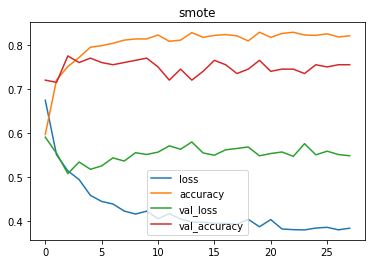

In [ ]:
# History des Modells grafisch anzeigen und als Grafik abspeichern 
plot_and_save_fig("history_smote","smote", history_smote)

In [ ]:
# Accuracy und Loss ermitteln
smote_test_loss, smote_test_acc = model_smote.evaluate(X_test_minmax, y_test_minmax, verbose = 0)

# Auf Basis des Modells für die Testdaten vorhersagen
predictions_smote = (model_smote.predict(X_test_minmax) > 0.5).astype("int32")

# Weitere Daten für die Evaluation erzeugen, auslesen und in das 'evaluation' DataFrame schreiben

# Speichern des 'classification_report' in ein Dictionary
report_smote = classification_report(y_test_minmax,predictions_smote, output_dict = True)

# Werte der Confusion Matrix generieren
tn_smote, fp_smote, fn_smote, tp_smote = confusion_matrix(y_test_minmax,predictions_smote).ravel()

# Vorbereitete Werte zusammenfassen und für Hinzufügen zum DataFrame vorbereiten
values_to_add = {'accuracy': report_smote['accuracy'],
                 'precision_0': report_smote['0']['precision'],
                 'precision_1': report_smote['1']['precision'],
                 'auc': get_auc_value(y_test_minmax,predictions_smote),
                 'loss': smote_test_loss,
                 'true_positives': tp_smote,
                 'true_negatives': tn_smote,
                 'false_positives': fp_smote,
                 'false_negatives': fn_smote}

row_to_add = pd.Series(values_to_add, name='smote')

# Werte dem DataFrame hinzufügen
evaluation = evaluation.append(row_to_add)

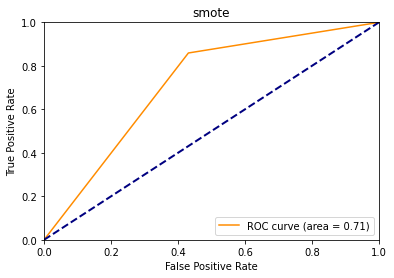

In [ ]:
# ROC Grafik für Modell erzeugen und abspeichern
get_roc(y_test_minmax, predictions_smote,'roc_smote','smote')

##Optimiertes Basismodell + Feature-Reduktion (skb)


In [ ]:
# History des Modells auslesen
history_skb = pd.DataFrame(model_skb.history.history)

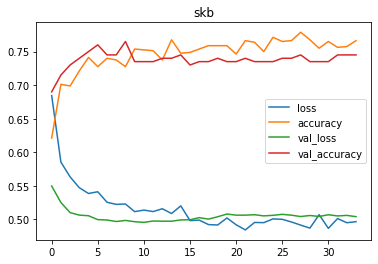

In [ ]:
# History des Modells grafisch anzeigen und als Grafik abspeichern 
plot_and_save_fig("history_skb","skb", history_skb)

In [ ]:
# Accuracy und Loss ermitteln
skb_test_loss, skb_test_acc = model_skb.evaluate(X_test_minmax_skb, y_test_minmax_skb, verbose = 0)

# Auf Basis des Modells für die Testdaten vorhersagen
predictions_skb = (model_skb.predict(X_test_minmax_skb) > 0.5).astype("int32")

# Weitere Daten für die Evaluation erzeugen, auslesen und in das 'evaluation' DataFrame schreiben

# Speichern des 'classification_report' in ein Dictionary
report_skb = classification_report(y_test_minmax_skb,predictions_skb, output_dict = True)

# Werte der Confusion Matrix generieren
tn_skb, fp_skb, fn_skb, tp_skb = confusion_matrix(y_test_minmax_skb,predictions_skb).ravel()

# Vorbereitete Werte zusammenfassen und für Hinzufügen zum DataFrame vorbereiten
values_to_add = {'accuracy': report_skb['accuracy'],
                 'precision_0': report_skb['0']['precision'],
                 'precision_1': report_skb['1']['precision'],
                 'loss': skb_test_loss,
                 'auc': get_auc_value(y_test_minmax_skb,predictions_skb),
                 'true_positives': tp_skb,
                 'true_negatives': tn_skb,
                 'false_positives': fp_skb,
                 'false_negatives': fn_skb}

row_to_add = pd.Series(values_to_add, name='skb')

# Werte dem DataFrame hinzufügen
evaluation = evaluation.append(row_to_add)

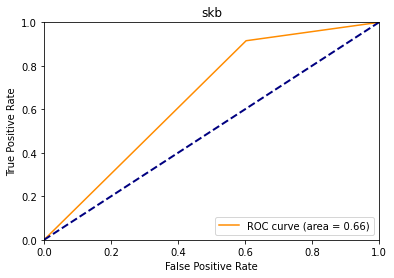

In [ ]:
# ROC Grafik für Modell erzeugen und abspeichern
get_roc(y_test_minmax_skb,predictions_skb,'roc_skb','skb')

##Optimiertes Basismodell + SMOTE + Feature-Reduktion (smote_skb)

In [ ]:
# History des Modells auslesen
history_smote_skb = pd.DataFrame(model_smote_skb.history.history)

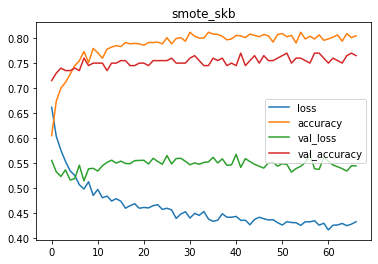

In [ ]:
# History des Modells grafisch anzeigen und als Grafik abspeichern 
plot_and_save_fig("history_smote_skb","smote_skb", history_smote_skb)

In [ ]:
# Accuracy und Loss ermitteln
smote_skb_test_loss, smote_skb_test_acc = model_smote_skb.evaluate(X_test_minmax_smote_skb, y_test_minmax_smote_skb, verbose = 0)

# Auf Basis des Modells für die Testdaten vorhersagen
predictions_smote_skb = (model_smote_skb.predict(X_test_minmax_smote_skb) > 0.5).astype("int32")

# Weitere Daten für die Evaluation erzeugen, auslesen und in das 'evaluation' DataFrame schreiben

# Speichern des 'classification_report' in ein Dictionary
# https://www.kite.com/python/answers/how-to-fill-a-pandas-dataframe-row-by-row-in-python
report_smote_skb = classification_report(y_test_minmax_smote_skb,predictions_smote_skb, output_dict = True)

# Werte der Confusion Matrix generieren
tn_smote_skb, fp_smote_skb, fn_smote_skb, tp_smote_skb = confusion_matrix(y_test_minmax_smote_skb,predictions_smote_skb).ravel()

# Vorbereitete Werte zusammenfassen und für Hinzufügen zum DataFrame vorbereiten
values_to_add = {'accuracy': report_smote_skb['accuracy'],
                 'precision_0': report_smote_skb['0']['precision'],
                 'precision_1': report_smote_skb['1']['precision'],
                 'auc': get_auc_value(y_test_minmax_smote_skb,predictions_smote_skb),
                 'loss': smote_skb_test_loss,
                 'true_positives': tp_smote_skb,
                 'true_negatives': tn_smote_skb,
                 'false_positives': fp_smote_skb,
                 'false_negatives': fn_smote_skb}

row_to_add = pd.Series(values_to_add, name='smote_skb')

# Werte dem DataFrame hinzufügen
evaluation = evaluation.append(row_to_add)

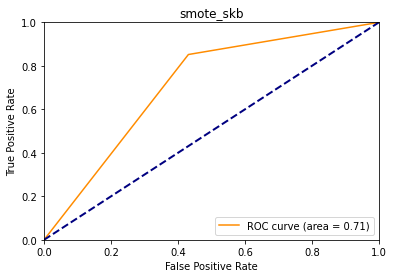

In [ ]:
# ROC Grafik für Modell erzeugen und abspeichern
get_roc (y_test_minmax_smote_skb,predictions_smote_skb,'roc_smote_skb','smote_skb')

##Vergleich der verschiedenen Modelle

In [ ]:
# Vorbereitung der Ergebnisse
# Runden
evaluation['precision_0'] = evaluation['precision_0'].round(decimals = 3)
evaluation['precision_1'] = evaluation['precision_1'].round(decimals = 3)
evaluation['auc'] = evaluation['auc'].round(decimals = 3)
evaluation['loss'] = evaluation['loss'].round(decimals = 3)

# Absolute Zahlen korrekt darstellen
evaluation.true_positives = evaluation.true_positives.astype('int64')
evaluation.true_negatives = evaluation.true_negatives.astype('int64')
evaluation.false_positives = evaluation.false_positives.astype('int64')
evaluation.false_negatives = evaluation.false_negatives.astype('int64')

# Quelle: https://datatofish.com/round-values-pandas-dataframe/
# Quelle: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/

In [ ]:
# Zusammenfassung der Evaluationskriterien ausgeben
evaluation

,accuracy,precision_0,precision_1,auc,loss,true_positives,true_negatives,false_positives,false_negatives
basic,0.725,0.529,0.792,0.648,0.811,118,27,31,24
basic_opt,0.790,0.735,0.801,0.684,0.487,133,25,33,9
smote,0.775,0.623,0.830,0.714,0.507,122,33,25,20
skb,0.765,0.657,0.788,0.656,0.499,130,23,35,12
smote_skb,0.770,0.611,0.829,0.711,0.541,121,33,25,21


In [ ]:
# Datenexport
evaluation.to_excel('evaluation.xlsx')

##Grafische Auswertung

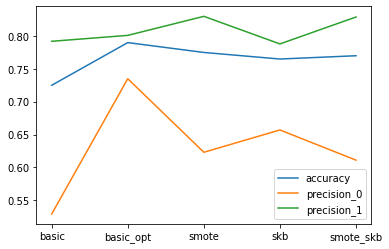

In [ ]:
# accuracy, precision_0, precision_1
plot_and_save_fig('evaluation_acc_prc','',evaluation[['accuracy','precision_0','precision_1']])

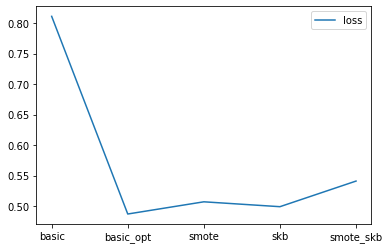

In [ ]:
# loss
plot_and_save_fig('evaluation_loss','',evaluation[['loss']])

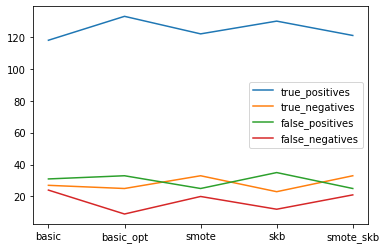

In [ ]:
# confusion matrix
plot_and_save_fig('evaluation_confusion_matrix_values_full','',evaluation[['true_positives','true_negatives','false_positives','false_negatives']])

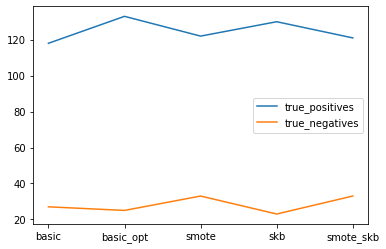

In [ ]:
# confusion matrix - korrekte Vorhersagen
plot_and_save_fig('evaluation_confusion_matrix_correct_predictions','',evaluation[['true_positives','true_negatives']])

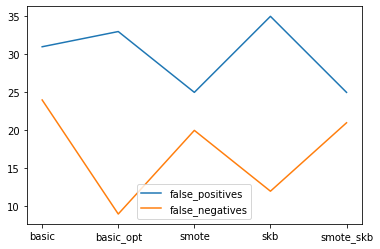

In [ ]:
# confusion matrix - falsche Vorhersagen
plot_and_save_fig('evaluation_confusion_matrix_incorrect_predictions','',evaluation[['false_positives','false_negatives']])